In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Activation, Dense
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.xception import Xception, preprocess_input
from keras.models import load_model
import keras.callbacks as kcall
import numpy as np
import matplotlib.pyplot as plt

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

DRIVE_DIR="/content/drive/My Drive/deeplearningproject/Images"
import os
print(os.listdir(DRIVE_DIR))

Using TensorFlow backend.


['archive_images2.tar.gz', 'archive_images3.tar.gz', 'archive_images4.tar.gz', 'archive_images5.tar.gz', 'archive_images6.tar.gz', 'archive_images7.tar.gz', 'archive_images8.tar.gz', 'archive_images9.tar.gz', 'archive_images10.tar.gz', 'archive_images11.tar.gz', 'archive_images12.tar.gz', 'images_test', 'images_train', 'Images_dummy', 'archive_images.tar.gz']


10001


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.


(1024, 1024)


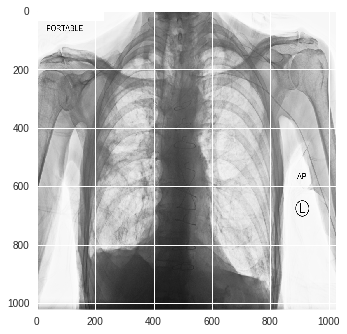

(1024, 1024, 3)


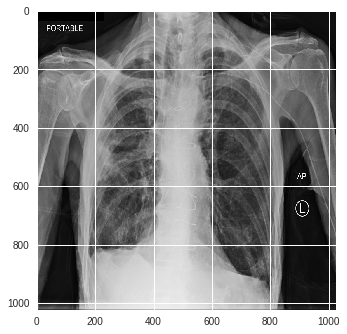

In [3]:
import tarfile
import numpy as np
import matplotlib.pyplot as plt
from scipy import misc
from PIL import Image

tar=tarfile.open("/content/drive/My Drive/deeplearningproject/Images/archive_images.tar.gz","r:gz")
count = 0
for member in tar.getmembers():
  f=tar.extractfile(member)
  
  if f is not None:
    content=f.read()
    
    count+=1
    #if count==19: 
      #break 

    
    
  
print(count)
face = misc.imread(f)
print(face.shape)
plt.imshow(face)

plt.show()

img = np.array(face)
stacked_img = np.stack((img,)*3, axis=-1)
print(stacked_img.shape)

plt.imshow(stacked_img)
plt.show()

In [0]:
import cv2
import datetime as dt
import h5py
import matplotlib.pyplot as plt
import matplotlib.pylab as plb
import numpy as np
import os
import pandas as pd
from glob import glob
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec
import matplotlib.ticker as ticker
sns.set_style('whitegrid')
%matplotlib inline

In [5]:
# def proc_images():
#     """
#     Saves compressed, resized images as HDF5 datsets
#     Returns
#         data.h5, where each dataset is an image or class label
#         e.g. X23,y23 = image and corresponding class label
#     """
#     start = dt.datetime.now()
#     # ../input/
#     PATH = os.path.abspath(os.path.join('..', '/content/drive/My Drive/'))
#     # ../input/sample/images/
#     SOURCE_IMAGES = os.path.join(PATH, "deeplearningproject", "Images")
#     # ../input/sample/images/*.png
#     images = glob(os.path.join(SOURCE_IMAGES, "*.png"))
#     # Load labels
#     labels = pd.read_csv('/content/drive/My Drive/deeplearningproject/Data_Entry_2017.csv')
       
#     # Set the disease type you want to look for
#     disease="Cardiomegaly"
#     # Size of data
#     NUM_IMAGES = len(images)
#     HEIGHT = 256
#     WIDTH = 256
#     CHANNELS = 3
#     SHAPE = (HEIGHT, WIDTH, CHANNELS)
    
#     with h5py.File('data.h5', 'w') as hf: 
#         for i,img in enumerate(images):            
#             # Images
#             image = cv2.imread(img)
#             image = cv2.resize(image, (WIDTH,HEIGHT), interpolation=cv2.INTER_CUBIC)
#             Xset = hf.create_dataset(
#                 name='X'+str(i),
#                 data=image,
#                 shape=(HEIGHT, WIDTH, CHANNELS),
#                 maxshape=(HEIGHT, WIDTH, CHANNELS),
#                 compression="gzip",
#                 compression_opts=9)
#             # Labels
#             base = os.path.basename(img)
#             finding = labels["Finding Labels"][labels["Image Index"] == base].values[0]
#             yset = hf.create_dataset(
#                 name='y'+str(i),
#                 shape=(1,),
#                 maxshape=(None,),
#                 compression="gzip",
#                 compression_opts=9)
#             if disease in finding:
#                 finding = 1
#                 yset = finding
#             else:
#                 finding = 0
#                 yset = finding
#             end=dt.datetime.now()
#             print("\r", i, ": ", (end-start).seconds, "seconds", end="")

new_img = tf.image.resize_images( stacked_img,[256, 256])
print(new_img.shape)
# plt.imshow(new_img)
#plt.imshow(new_img[0].astype(np.uint8))
#plt.show()


(256, 256, 3)


In [7]:
#import image data set description
df = pd.read_csv('/content/drive/My Drive/deeplearningproject/Data_Entry_2017.csv')
df.head()

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y],Unnamed: 11
0,00000001_000.png,Cardiomegaly,0,1,58,M,PA,2682,2749,0.143,0.143,NaN
1,00000001_001.png,Cardiomegaly|Emphysema,1,1,58,M,PA,2894,2729,0.143,0.143,NaN
2,00000001_002.png,Cardiomegaly|Effusion,2,1,58,M,PA,2500,2048,0.168,0.168,NaN
3,00000002_000.png,No Finding,0,2,81,M,PA,2500,2048,0.171,0.171,NaN
4,00000003_000.png,Hernia,0,3,81,F,PA,2582,2991,0.143,0.143,NaN


In [8]:
df.describe()

,Follow-up #,Patient ID,Patient Age,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y],Unnamed: 11
count,112120.000000,112120.000000,112120.000000,112120.000000,112120.000000,112120.000000,112120.000000,0.0
mean,8.573751,14346.381743,46.901463,2646.078844,2486.438842,0.155649,0.155649,NaN
std,15.406320,8403.876972,16.839923,341.246429,401.268227,0.016174,0.016174,NaN
min,0.000000,1.000000,1.000000,1143.000000,966.000000,0.115000,0.115000,NaN
25%,0.000000,7310.750000,35.000000,2500.000000,2048.000000,0.143000,0.143000,NaN
50%,3.000000,13993.000000,49.000000,2518.000000,2544.000000,0.143000,0.143000,NaN
75%,10.000000,20673.000000,59.000000,2992.000000,2991.000000,0.168000,0.168000,NaN
max,183.000000,30805.000000,414.000000,3827.000000,4715.000000,0.198800,0.198800,NaN


1. A. Data cleaning :


In [0]:
#drop unused columns
df = df[['Image Index','Finding Labels','Follow-up #','Patient ID','Patient Age','Patient Gender']]

#create new columns for each decease
pathology_list = ['Cardiomegaly','Emphysema','Effusion','Hernia','Nodule','Pneumothorax','Atelectasis','Pleural_Thickening','Mass','Edema','Consolidation','Infiltration','Fibrosis','Pneumonia']

for pathology in pathology_list :
    df[pathology] = df['Finding Labels'].apply(lambda x: 1 if pathology in x else 0)

We also have strange values for 'Follow-up #' comparing to 'Patient Age'. So we cant consider that 'Follow-up #' are on chronological orderer :

In [10]:
df.loc[df['Patient ID']==5567,['Patient Age','Finding Labels','Follow-up #']].sort_values('Follow-up #',ascending=True)
df.loc[df['Patient ID']==5567,['Patient Age','Finding Labels','Follow-up #']].sort_values('Patient Age',ascending=False)

,Patient Age,Finding Labels,Follow-up #
20852,412,Effusion|Pneumonia,0
20861,57,No Finding,9
20859,57,Fibrosis,7
20860,57,Fibrosis,8
20856,54,Atelectasis,4
20857,54,Atelectasis,5
20858,54,No Finding,6
20876,53,Atelectasis|Consolidation,24
20853,53,Effusion,1
20877,53,Pneumonia,25


1. C. Display number of each deseases by patient gender

1. D. Now check age distribution by sex:

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


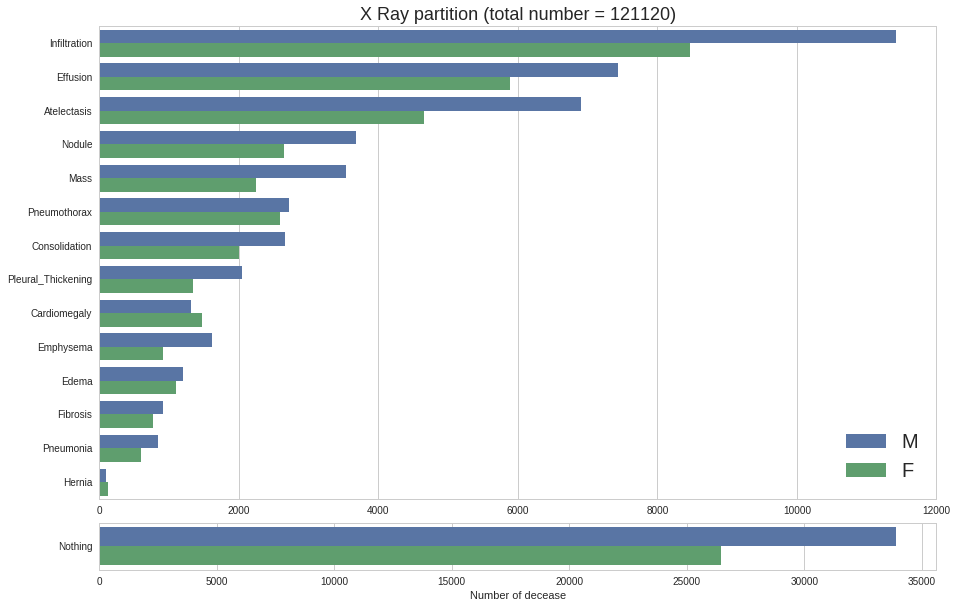

In [43]:
plt.figure(figsize=(15,10))
gs = gridspec.GridSpec(8,1)
ax1 = plt.subplot(gs[:7, :])
ax2 = plt.subplot(gs[7, :])
data1 = pd.melt(df,
             id_vars=['Patient Gender'],
             value_vars = list(pathology_list),
             var_name = 'Category',
             value_name = 'Count')
data1 = data1.loc[data1.Count>0]
g=sns.countplot(y='Category',hue='Patient Gender',data=data1, ax=ax1, order = data1['Category'].value_counts().index)
ax1.set( ylabel="",xlabel="")
ax1.legend(fontsize=20)
ax1.set_title('X Ray partition (total number = 121120)',fontsize=18);

df['Nothing']=df['Finding Labels'].apply(lambda x: 1 if 'No Finding' in x else 0)

data2 = pd.melt(df,
             id_vars=['Patient Gender'],
             value_vars = list(['Nothing']),
             var_name = 'Category',
             value_name = 'Count')
data2 = data2.loc[data2.Count>0]
g=sns.countplot(y='Category',hue='Patient Gender',data=data2,ax=ax2)
ax2.set( ylabel="",xlabel="Number of decease")
ax2.legend('')
plt.subplots_adjust(hspace=.5)

In [0]:
Age=df[['Patient Age']]

In [0]:
df['Age']=df[['Patient Age']].apply(lambda x: x[:-1]).astype(int)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


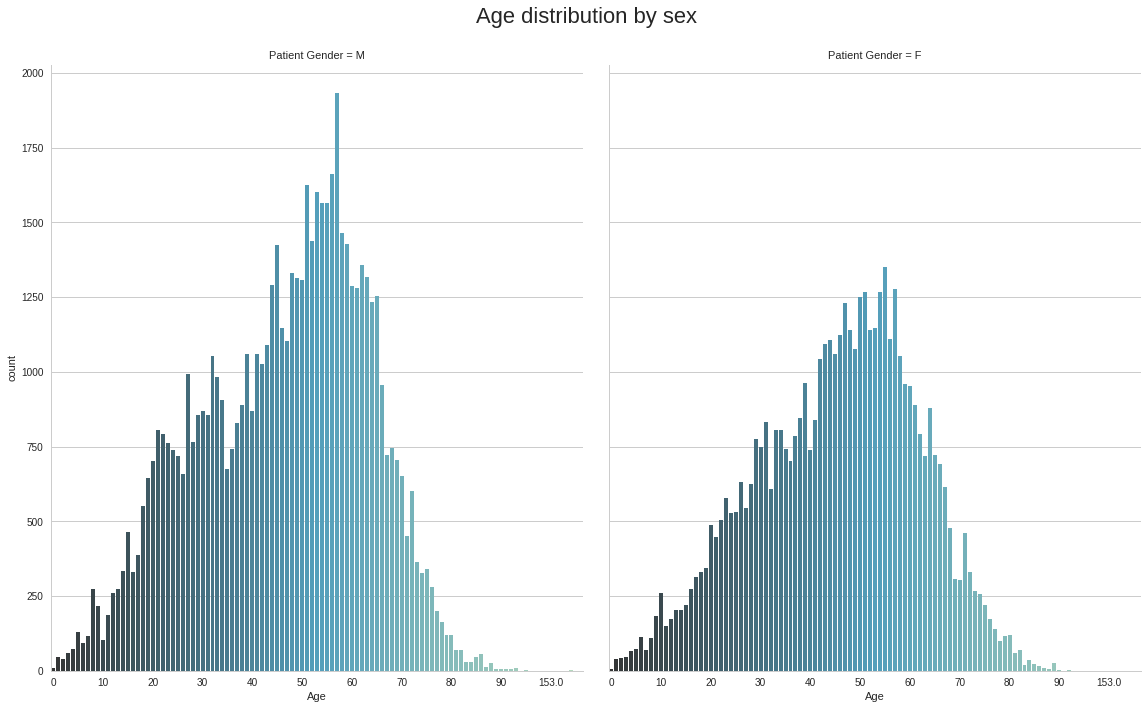

In [67]:
g = sns.factorplot(x="Age", col="Patient Gender",data=df, kind="count",size=10, aspect=0.8,palette="GnBu_d");
g.set_xticklabels(np.arange(0,100));
g.set_xticklabels(step=10);
g.fig.suptitle('Age distribution by sex',fontsize=22);
g.fig.subplots_adjust(top=.9)

In [68]:
df['Age'].sort_values(ascending=False).head(20)

46965     414.0
86264     413.0
20852     412.0
85404     412.0
91369     412.0
84810     411.0
104590    155.0
101194    155.0
98495     154.0
95794     153.0
74884     152.0
78795     151.0
58650     150.0
62929     149.0
48284     148.0
55742     148.0
58464      95.0
74735      94.0
576        94.0
577        94.0
Name: Age, dtype: float64

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


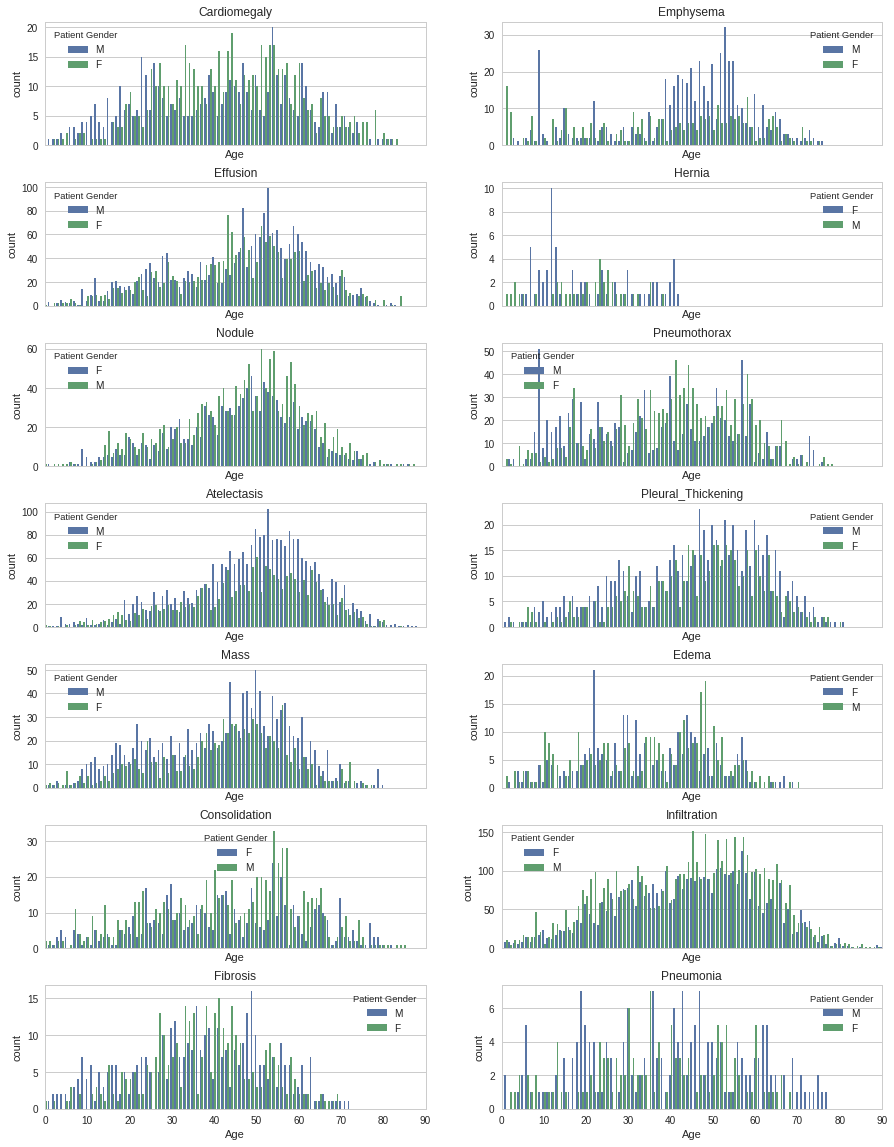

In [69]:
f, axarr = plt.subplots(7, 2, sharex=True,figsize=(15, 20))

i=0
j=0
x=np.arange(0,100,10)
for pathology in pathology_list :
    g=sns.countplot(x='Age', hue="Patient Gender",data=df[df['Finding Labels']==pathology], ax=axarr[i, j])
    axarr[i, j].set_title(pathology)   
    g.set_xlim(0,90)
    g.set_xticks(x)
    g.set_xticklabels(x)
    j=(j+1)%2
    if j==0:
        i=(i+1)%7
f.subplots_adjust(hspace=0.3)

F. Display patient number by Follow-up in details:

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


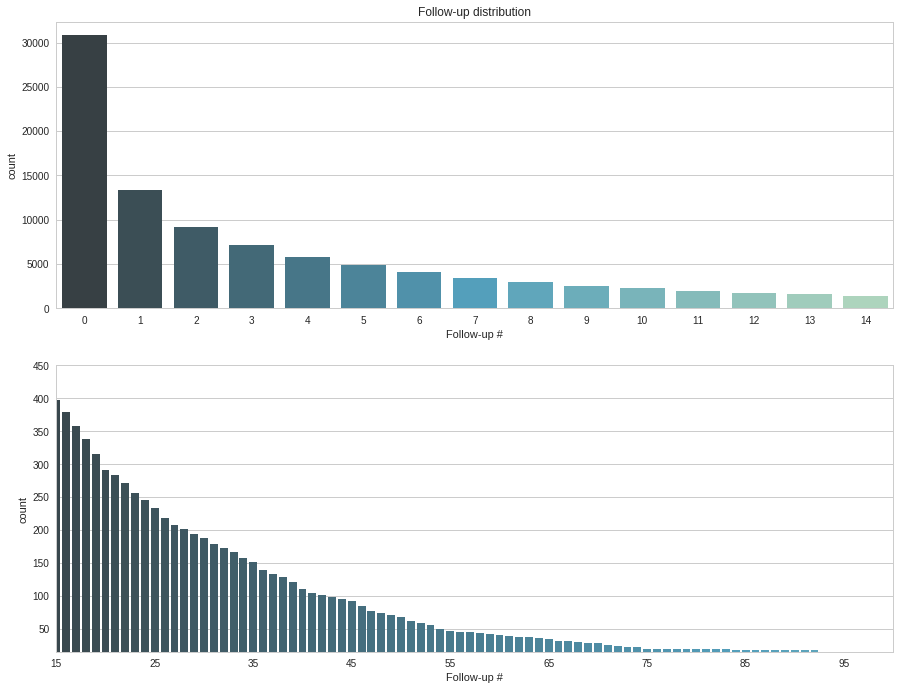

In [70]:
f, (ax1,ax2) = plt.subplots( 2, figsize=(15, 10))

data = df[df['Follow-up #']<15]
g = sns.countplot(x='Follow-up #',data=data,palette="GnBu_d",ax=ax1);

ax1.set_title('Follow-up distribution');
data = df[df['Follow-up #']>14]
g = sns.countplot(x='Follow-up #',data=data,palette="GnBu_d",ax=ax2);
x=np.arange(15,100,10)
g.set_ylim(15,450)
g.set_xlim(15,100)
g.set_xticks(x)
g.set_xticklabels(x)
f.subplots_adjust(top=1)

G. Try to find links between pathologies.

In [71]:
#First display Top 10 multiple deseases
data=df.groupby('Finding Labels').count().sort_values('Patient ID',ascending=False).head(23)
data=data[['|' in index for index in data.index.values]]
data

,Image Index,Follow-up #,Patient ID,Patient Age,Patient Gender,Cardiomegaly,Emphysema,Effusion,Hernia,Nodule,...,Atelectasis,Pleural_Thickening,Mass,Edema,Consolidation,Infiltration,Fibrosis,Pneumonia,Nothing,Age
Finding Labels,,,,,,,,,,,,,,,,,,,,,
Effusion|Infiltration,1603,1603,1603,1603,1603,1603,1603,1603,1603,1603,...,1603,1603,1603,1603,1603,1603,1603,1603,1603,1603
Atelectasis|Infiltration,1350,1350,1350,1350,1350,1350,1350,1350,1350,1350,...,1350,1350,1350,1350,1350,1350,1350,1350,1350,1350
Atelectasis|Effusion,1165,1165,1165,1165,1165,1165,1165,1165,1165,1165,...,1165,1165,1165,1165,1165,1165,1165,1165,1165,1165
Infiltration|Nodule,829,829,829,829,829,829,829,829,829,829,...,829,829,829,829,829,829,829,829,829,829
Atelectasis|Effusion|Infiltration,737,737,737,737,737,737,737,737,737,737,...,737,737,737,737,737,737,737,737,737,737
Cardiomegaly|Effusion,484,484,484,484,484,484,484,484,484,484,...,484,484,484,484,484,484,484,484,484,484
Consolidation|Infiltration,441,441,441,441,441,441,441,441,441,441,...,441,441,441,441,441,441,441,441,441,441
Infiltration|Mass,420,420,420,420,420,420,420,420,420,420,...,420,420,420,420,420,420,420,420,420,420
Effusion|Pneumothorax,403,403,403,403,403,403,403,403,403,403,...,403,403,403,403,403,403,403,403,403,403


Now we need to compare ratio between simple and multiple deseases

In [0]:
data=df.groupby('Finding Labels').count().sort_values('Patient ID',ascending=False)
df1=data[['|' in index for index in data.index]].copy()
df2=data[['|' not in index for index in data.index]]
df2=df2[['No Finding' not in index for index in df2.index]]
df2['Finding Labels']=df2.index.values
df1['Finding Labels']=df1.index.values

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


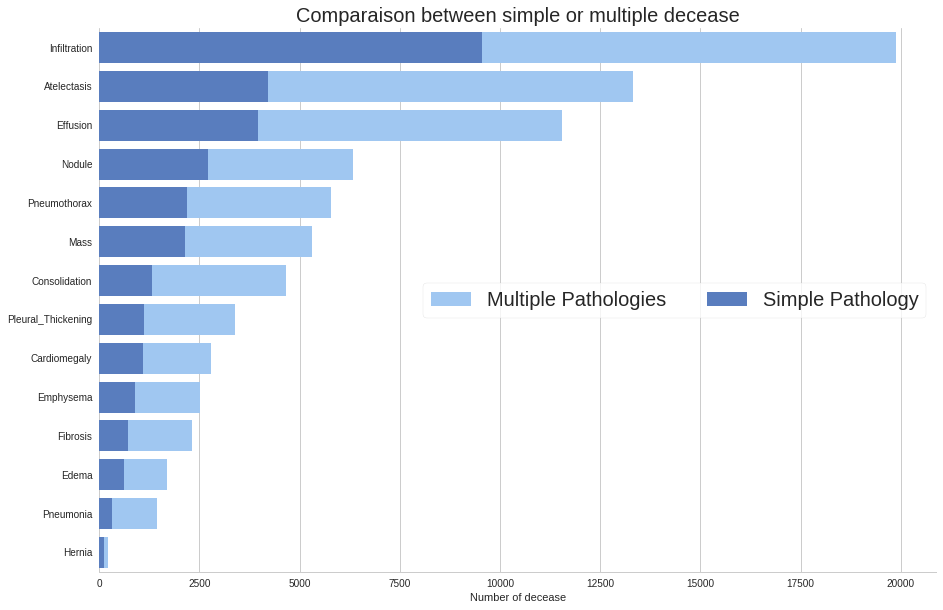

In [73]:
f, ax = plt.subplots(sharex=True,figsize=(15, 10))
sns.set_color_codes("pastel")
g=sns.countplot(y='Category',data=data1, ax=ax, order = data1['Category'].value_counts().index,color='b',label="Multiple Pathologies")
sns.set_color_codes("muted")
g=sns.barplot(x='Patient ID',y='Finding Labels',data=df2, ax=ax, color="b",label="Simple Pathology")
ax.legend(ncol=2, loc="center right", frameon=True,fontsize=20)
ax.set( ylabel="",xlabel="Number of decease")
ax.set_title("Comparaison between simple or multiple decease",fontsize=20)      
sns.despine(left=True)

Plot most important pathologies groups for each desease

In [74]:
#we just keep groups of pathologies which appear more than 30 times
df3=df1.loc[df1['Patient ID']>30,['Patient ID','Finding Labels']]

for pathology in pathology_list:
    df3[pathology]=df3.apply(lambda x: x['Patient ID'] if pathology in x['Finding Labels'] else 0, axis=1)

df3.head(20)

,Patient ID,Finding Labels,Cardiomegaly,Emphysema,Effusion,Hernia,Nodule,Pneumothorax,Atelectasis,Pleural_Thickening,Mass,Edema,Consolidation,Infiltration,Fibrosis,Pneumonia
Finding Labels,,,,,,,,,,,,,,,,
Effusion|Infiltration,1603,Effusion|Infiltration,0,0,1603,0,0,0,0,0,0,0,0,1603,0,0
Atelectasis|Infiltration,1350,Atelectasis|Infiltration,0,0,0,0,0,0,1350,0,0,0,0,1350,0,0
Atelectasis|Effusion,1165,Atelectasis|Effusion,0,0,1165,0,0,0,1165,0,0,0,0,0,0,0
Infiltration|Nodule,829,Infiltration|Nodule,0,0,0,0,829,0,0,0,0,0,0,829,0,0
Atelectasis|Effusion|Infiltration,737,Atelectasis|Effusion|Infiltration,0,0,737,0,0,0,737,0,0,0,0,737,0,0
Cardiomegaly|Effusion,484,Cardiomegaly|Effusion,484,0,484,0,0,0,0,0,0,0,0,0,0,0
Consolidation|Infiltration,441,Consolidation|Infiltration,0,0,0,0,0,0,0,0,0,0,441,441,0,0
Infiltration|Mass,420,Infiltration|Mass,0,0,0,0,0,0,0,0,420,0,0,420,0,0
Effusion|Pneumothorax,403,Effusion|Pneumothorax,0,0,403,0,0,403,0,0,0,0,0,0,0,0


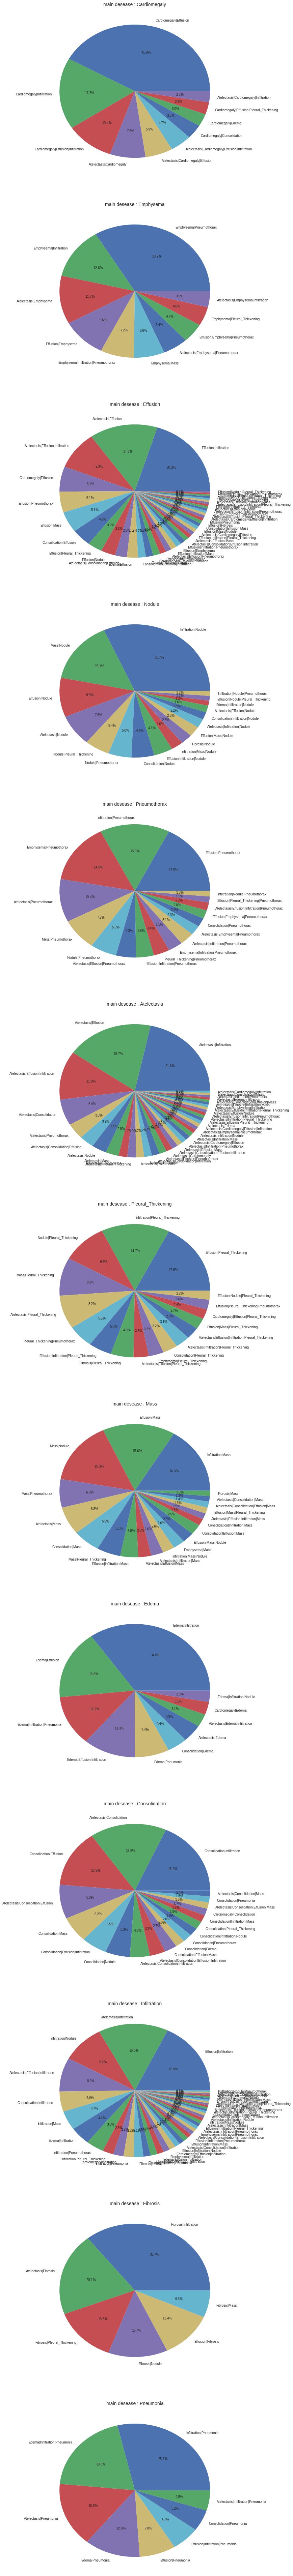

In [75]:
#'Hernia' has not enough values to figure here
df4=df3[df3['Hernia']>0]  # df4.size == 0
#remove 'Hernia' from list
pat_list=[elem for elem in pathology_list if 'Hernia' not in elem]

f, axarr = plt.subplots(13, sharex=True,figsize=(10, 140))
i=0
for pathology in pat_list :
    df4=df3[df3[pathology]>0]
    if df4.size>0:  #'Hernia' has not enough values to figure here
        axarr[i].pie(df4[pathology],labels=df4['Finding Labels'], autopct='%1.1f%%')
        axarr[i].set_title('main desease : '+pathology,fontsize=14)   
        i +=1

We can see that some pathologies seem to appear with all kind of pathology:

Effusion
Aletectasis
Infiltration Some others seem to have favorite couple:
Cardiomegaly with Effusion
Emphysema with Pneumothorax
Nodule with Infiltration
Edema with Infiltration
Fibrosis with Infiltration
Pneumonia with Infiltration

After doing some data analysis, we will try to train model. Before that we will correspond our images with given labels.

In [6]:
import pandas as pd
import numpy as np
import os
from collections import defaultdict
from skimage.io import imread
import random


class Data:
	def __init__(self, y_file):
		self.train = None
		self.test = None
		self.next_batch_start = 0

		df = pd.read_csv(y_file)
		d = dict(zip(df['Image Index'], df['Finding Labels']))
		self.single_labels = dict((x, d[x].strip().split("|")[0]) for x in d)
		self.multi_labels = dict((x, d[x].strip().split("|")) for x in d)

	def get_data(self, x_path):
		image_filenames = [x for x in os.listdir(x_path) if x.endswith(".png")]

		images = []
		labels = []
		for i in range(len(image_filenames)):
			if i >= len(image_filenames):
				break
			image_filename = image_filenames[i]
			images_append = np.asarray(imread(x_path + "/" + image_filename)).flatten()
			if images_append.shape[0] != 1024 * 1024:
				continue
			images.append(images_append)
			diseases = self.multi_labels[image_filename]
			diseases_representation = [0] * len(given_labels)
			for disease in diseases:
				diseases_representation[disease_to_index[disease]] = 1
			labels.append(np.asarray(diseases_representation))

		return (images, labels)

	def load_train_data(self, x_path):
		self.train = self.get_data(x_path)

	def load_test_data(self, x_path):
		self.test = self.get_data(x_path)

	def get_batch(self, batch_size):
		xs = []
		ys = []
		num_examples = len(self.train[0])
		for example in range(self.next_batch_start, self.next_batch_start + batch_size):
			x_append = self.train[0][example % num_examples]
			y_append = self.train[1][example % num_examples]
			xs.append(x_append)
			ys.append(y_append)
		example %= num_examples
		self.next_batch_start = example + 1
		xs = np.asarray(xs)
		ys = np.asarray(ys)
		return (xs, ys)


image_side_length = 1024

image_size = image_side_length * image_side_length

given_labels = ['Atelectasis', 'Cardiomegaly', 'Consolidation', 'Edema', 'Effusion',
				'Emphysema', 'Fibrosis', 'Hernia', 'Infiltration', 'Mass', 'No Finding',
				'Nodule', 'Pleural_Thickening', 'Pneumonia', 'Pneumothorax']

disease_to_index = dict((given_labels[i], i) for i in range(len(given_labels)))
num_diseases = len(given_labels)


data = Data("/content/drive/My Drive/deeplearningproject/Data_Entry_2017.csv")
data.load_train_data("/content/drive/My Drive/deeplearningproject/Images/Images_dummy/")
data.load_test_data("/content/drive/My Drive/deeplearningproject/Images/Images_dummy/")
print(data)

W = np.random.rand(image_size, num_diseases)
B = 100
m = len(data.train[0])

def softmax(x):
	if (len(x) != num_diseases):
		raise ValueError("Wrong size")
	subtract = np.expand_dims(np.amax(x), axis=1)
	expon = np.exp(x - subtract)
	s = expon / np.expand_dims(np.sum(expon), axis=1)
	return s

def p(x, W):
	# x is 1024^2
	# W is 1024^2xnum_diseases
	adjusted = W.T.dot(x)
	return softmax(adjusted)


def P(X, W):
	return np.apply_along_axis(p, 1, X, W)

alpha = .5
for epoch in range(5):
	print("epoch %d" % epoch)
	for _ in range(int(m / B)):
		batch_xs, batch_ys = data.get_batch(B)
		batch_xs /= np.max(batch_xs)
		grad_W = np.zeros_like(W)
		p_for_examples = P(batch_xs, W)
		for j in range(num_diseases):
			extracted_y = batch_ys[:, j]
			adjusted = extracted_y - p_for_examples[:, j]
			multiplied = batch_xs * adjusted[:, np.newaxis]
			collapsed = np.sum(multiplied, axis = 0)
			grad_W[:, j] += 1./B * collapsed
		W -= alpha * grad_W
		

print(W)

def compute_accuracy(yhat, y):
	k = np.sum(y)
	top_ind = np.argpartition(yhat, -k)[-k:]
	my_top = np.zeros(num_diseases)
	my_top[top_ind] = 1
	return np.sum(my_top * y) / (k + 0.0)

test_xs, test_ys = data.test
total = 0.0

for i in range(len(test_xs)):
	x = test_xs[i]
	y = test_ys[i]
	total += compute_accuracy(W.T.dot(x), y)

print(total)
print(len(test_xs))
print(total / len(test_xs), len(test_xs))


epoch 0
epoch 1
epoch 2
epoch 3
epoch 4
[[0.63100503 0.46478015 0.79948765 ... 0.80583325 0.48583916 0.15086825]
 [0.26437496 0.03583311 0.35988539 ... 0.72283577 0.12037798 0.53683305]
 [0.07945041 0.4905098  0.21844883 ... 0.2641252  0.57430959 0.11825297]
 ...
 [0.48057018 0.1913461  0.87689038 ... 0.75795393 0.3511134  0.65072021]
 [0.76522515 0.15832668 0.80049224 ... 0.87759928 0.04517598 0.8247205 ]
 [0.75452614 0.99240481 0.58578286 ... 0.51603408 0.00738117 0.06423801]]
9.0
23
0.391304347826087 23


Sorry, we couldnt finish the project. Sorry for the inconvenience. We decided to send our work even though we couldnt finish it. These are all the work we were able to do. Thanks for the great semester. 

In [0]:
from keras import applications
from keras import backend as K
from keras.applications import ResNet50
from keras.applications.resnet50 import preprocess_input
from keras.models import Sequential, Model
from keras.layers import Dense, Activation, Dropout, Flatten, Input, merge #Merge
from keras.layers import Add
from keras.layers import Concatenate 
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D
from keras.layers.merge import concatenate
from keras.layers.normalization import BatchNormalization
from keras.callbacks import TensorBoard, ModelCheckpoint
from keras import regularizers, optimizers, metrics
from keras.losses import categorical_crossentropy, binary_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras import metrics
import sklearn.metrics as metrics
import matplotlib.pyplot as plt
import numpy as np
import numpy as np
from io import BytesIO
from base64 import b64encode
import PIL.Image, IPython.display
from skimage import transform
#import imageio
#!pip install imageio
import imageio
import os
import sys
import subprocess
import csv
import pandas as pd
import tensorflow as tf
import glob
from os import path

#LOG_PATH = './data/logs'
NUM_LABELS = 15
num_epochs = 10
train_batch_size = 20
reg = 1e-5
lr = 3e-3
num_not_trainable = 0
num_diseases = 15
sess=tf.InteractiveSession()

def plot():
  pass

def get_training_data(train_paths, xtrain_path, ytrain_path, recompute=True, isTraining = True):
  train_images = []
  train_files = []
  for train_path in train_paths:
    for filename in os.listdir(train_path):
      if filename.endswith(".png"):
        train_files.append(train_path + filename)
  
  labels_df = pd.read_csv("/content/drive/My Drive/deeplearningproject/Data_Entry_2017.csv")
  given_labels = np.array(['Atelectasis', 'Cardiomegaly', 'Consolidation',
		'Edema', 'Effusion', 'Emphysema', 'Fibrosis', 'Hernia', 'Infiltration',
		'Mass', 'No Finding', 'Nodule', 'Pleural_Thickening', 'Pneumonia', 'Pneumothorax'])
  disease_to_index = dict((given_labels[i], i) for i in range(len(given_labels)))
  
  d = dict(zip(labels_df['Image Index'], labels_df['Finding Labels']))
  diseases_for_photos = {k: v.split("|") for k, v in d.items()}
  
  age_dict = dict(zip(labels_df['Image Index'], labels_df['Patient Age']))
  gender_dict = dict(zip(labels_df['Image Index'], labels_df['Patient Gender']))
  number_visits_dict = dict(zip(labels_df['Image Index'], labels_df['Follow-up #']))
  
  NUM_SAMPLES = int(24)
  print(NUM_SAMPLES)
  
  number_have = 0
  features = []
  labels = np.zeros((NUM_SAMPLES, len(given_labels)))
  
  age = np.zeros(NUM_SAMPLES)
  gender = np.zeros(NUM_SAMPLES)
  number_visits = np.zeros(NUM_SAMPLES)
  
  for i in range(len(train_files)):
    if number_have == NUM_SAMPLES:
      break
    train_file = train_files[i]
    train_image = imageio.imread(train_file)
    feature_set = np.asarray(train_image)
    if i % 1000 == 0:
      print("processed " + str(i) + " files");
    if feature_set.size == 1024 * 1024:
      filename = train_file.split("/")[-1]
      features.append(feature_set.astype(int))
      diseases = diseases_for_photos[filename]
      indices = [disease_to_index[disease] for disease in diseases]
      labels[number_have, indices] = 1
      #age[number_have] = float(age_dict[filename][:-1])
      if (gender_dict[filename] == 'F'):
        gender[number_have] = 0
      else:
        gender[number_have] = 1
      number_visits[number_have] = number_visits_dict[filename]
      number_have += 1
  features = np.array(features)
  features = np.expand_dims(features, axis=3)
  
  return features, labels, age, gender, number_visits

def variable_top_k_accuracy(y_true, y_pred):
  k_values = tf.reduce_sum(y_true, axis=0)
  acc_sum = 0
  for i in range(train_batch_size):
    y_pred_row = tf.expand_dims(y_pred[i, :], axis=0)
    y_true_row = tf.expand_dims(y_true[i, :], axis=0)
    num_diseases = tf.reduce_sum(y_true_row)
    _, indices = tf.nn.top_k(y_pred_row, k = tf.cast(num_diseases, dtype=tf.int32))
    acc_sum += tf.cast(tf.reduce_sum(tf.gather(y_true_row, indices)), dtype=tf.int32)
  acc_sum /= range(y_true.shape[0])
  return acc_sum

def f1(y_true, y_pred):
  def recall(y_true, y_pred):
    """Recall metric.
    Only computes a batch-wise average of recall.
    Computes the recall, a metric for multi-label classification of
    how many relevant items are selected."""
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall
  def precision(y_true, y_pred):
    """Precision metric. Only computes a batch-wise average of precision.
    Computes the precision, a metric for multi-label classification of 
    how many selected items are relevant."""
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision
  precision = precision(y_true, y_pred)
  recall = recall(y_true, y_pred)
  return 2*((precision*recall)/(precision+recall))

def mixed_ce_objective(y_true, y_pred):
  y_true_multiclass = y_true
  y_pred_multiclass = y_pred
  multiclass_ce = K.mean(K.categorical_crossentropy(y_true_multiclass, y_pred_multiclass))
  return multiclass_ce

def create_model():
  print('Loaded Pre-Trained Model')
  resnet50 = ResNet50(weights="imagenet", include_top=False, input_shape=(256, 256, 3))
  for layer in resnet50.layers[:num_not_trainable]:
    layer.trainable = False
  x = Flatten()(resnet50.output)
  preds = Dense(15, activation='softmax', kernel_regularizer=regularizers.l2(reg))(x) # hardcoded 15
  #filter, kernel, strides
  model = Sequential()
  model.add(Conv2D(32, 5, strides=(2, 2), activation='linear', padding='same', name='conv1_1', input_shape=(1024,1024,1)))
  model.add(Dropout(0.5))
  #model.add(MaxPooling2D())
  model.add(Conv2D(3, 5, strides=(2, 2), activation='relu', padding='same', name='conv1_2'))
  model.add(Dropout(0.5))
  #model.add(MaxPooling2D())
  model.add(Model(inputs=resnet50.input, outputs=preds))
  print(len(model.layers))
  adam = optimizers.Adam(lr=lr)
  return model


def compute_accuracy(prediction, y_train):
  acc_sum = 0.0
  for i in range(prediction.shape[0]):
    acc_sum += compute_accuracy_single_row(prediction[i, :], y_train[i, :])
  return acc_sum / prediction.shape[0]

def compute_accuracy_single_row(yhat, y):
  k = int(np.sum(y))
  top_ind = np.argpartition(yhat, -k)[-k:]
  my_top = np.zeros(num_diseases)
  my_top[top_ind] = 1
  return np.sum(my_top * y) / (k + 0.0)

def main():
  X_train, y_train, ages, genders, visits = get_training_data(["/content/drive/My Drive/deeplearningproject/Images/Images_dummy/"], "X_train_preprocessed.npy", "train_labels.npy", isTraining=True)
  prev_model = create_model()
  print(X_train)
  print("this hmmm")
  resnet = prev_model.layers.pop()
  resnet.layers.pop()
  resnet.layers[-1].outbound_nodes = []
  resnet.outputs = [resnet.layers[-1].output]
  
  #output = resnet.get_layer('avg_pool').output
  #output = Flatten()(output)
  metadata = np.stack((ages, genders, visits), axis=1)
  
  extra = Sequential()
  extra.add(Activation('linear', input_shape=(3, )))
  extra.add(Dense(10, activation='softmax'))
  
  combined = Sequential();
  #print("th")
  combined.add(Concatenate([prev_model, extra],))
  combined.add(Dense(15, activation='softmax'))
  adam = optimizers.Adam(lr=lr)
  combined.compile(optimizer=adam,
                   loss=mixed_ce_objective,
                   metrics={'accuracy':variable_top_k_accuracy, 'f1':f1})
  
  history = combined.fit(x=[X_train, metadata], y=y_train, validation_split=0.1, epochs=num_epochs, batch_size=train_batch_size)
  
  np.save("weights.npy", combined.layers[-1].get_weights())
  counter = 0
  for weights in combined.layers[-1].get_weights():
    np.savetxt("weights" + str(counter) + ".txt", weights, delimiter=',')
    counter += 1
  X_test, y_test, ages, genders, visits = get_training_data(["/content/drive/My Drive/deeplearningproject/Images/Images_dummy/"], "X_test_concat.npy", None, isTraining = False)
 # print(X_test)
  metadata_test = np.stack([ages, genders, visits], axis=1)
 # print(metadata_test)

  #print([X_test, metadata_test])
  
  prediction = combined.predict(x=[X_test, metadata_test])
  prediction_tensor = tf.convert_to_tensor(prediction)
  y_test_tensor = tf.convert_to_tensor(y_test)
  print("TEST ACCURACY: ")
  print(compute_accuracy(prediction, y_test))
  '''f = open('predictions_test.txt','w')
  for image in prediction:
    for i in range(len(image)):
      if i != (len(image)-1):
        f.write("%s, " % image[i])
			else:
        f.write("%s" % image[i])
    f.write("\n")
	'''


if __name__ == '__main__':
  main()